In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Activation, Dropout, Flatten

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [0]:
num_classes = 7 #angry, disgust, fear, happy, sad, surprise, neutral
batch_size = 256
epochs = 30

In [19]:
with open("gdrive/My Drive/Colab Notebooks/fer2013.csv") as f:
  content = f.readlines()

lines = np.array(content)

num_of_instances = lines.size
print("number of instances: ",num_of_instances)
print("instance length: ",len(lines[1].split(",")[1].split(" ")))

number of instances:  35888
instance length:  2304


In [0]:
x_train, y_train, x_test, y_test = [], [], [], []

In [0]:
for i in range(1,num_of_instances):
    try:
        emotion, img, usage = lines[i].split(",")
          
        val = img.split(" ")
            
        pixels = np.array(val, 'float32')
        
        emotion = keras.utils.to_categorical(emotion, num_classes)
    
        if 'Training' in usage:
            y_train.append(emotion)
            x_train.append(pixels)
        elif 'PublicTest' in usage:
            y_test.append(emotion)
            x_test.append(pixels)
    except:
      print("", end="")

In [0]:
x_train = np.array(x_train, 'float32')
y_train = np.array(y_train, 'float32')
x_test = np.array(x_test, 'float32')
y_test = np.array(y_test, 'float32')


In [0]:
x_train /= 255 #normalize inputs between [0, 1]
x_test /= 255

In [0]:
x_train = x_train.reshape(x_train.shape[0], 48, 48, 1)
x_train = x_train.astype('float32')
x_test = x_test.reshape(x_test.shape[0], 48, 48, 1)
x_test = x_test.astype('float32')


In [25]:
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

28709 train samples
3589 test samples


In [0]:
model = Sequential()

#1st convolution layer
model.add(Conv2D(64, (5, 5), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(5,5), strides=(2, 2)))

#2nd convolution layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))

#3rd convolution layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))

model.add(Flatten())

#fully connected neural networks
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(num_classes, activation='softmax'))
gen = ImageDataGenerator()
train_generator = gen.flow(x_train, y_train, batch_size=batch_size)


In [0]:
model.compile(loss='categorical_crossentropy'
    , optimizer=keras.optimizers.Adam()
    , metrics=['accuracy']
)

In [28]:
fit = True

if fit == True:
	model.fit_generator(train_generator, steps_per_epoch=batch_size, epochs=epochs) 
else:
	model.load_weights('facial_expression_model_weights.h5') 
	

Epoch 1/30
256/256 [==============================] - 18s 69ms/step - loss: 1.7865 - acc: 0.2595
Epoch 2/30
256/256 [==============================] - 16s 64ms/step - loss: 1.5740 - acc: 0.3753
Epoch 3/30
256/256 [==============================] - 16s 64ms/step - loss: 1.3861 - acc: 0.4675
Epoch 4/30
256/256 [==============================] - 16s 64ms/step - loss: 1.2671 - acc: 0.5172
Epoch 5/30
256/256 [==============================] - 17s 64ms/step - loss: 1.1773 - acc: 0.5510
Epoch 6/30
256/256 [==============================] - 17s 65ms/step - loss: 1.1049 - acc: 0.5822
Epoch 7/30
256/256 [==============================] - 17s 65ms/step - loss: 1.0396 - acc: 0.6097
Epoch 8/30
256/256 [==============================] - 16s 64ms/step - loss: 0.9808 - acc: 0.6333
Epoch 9/30
256/256 [==============================] - 16s 64ms/step - loss: 0.9103 - acc: 0.6611
Epoch 10/30
256/256 [==============================] - 16s 64ms/step - loss: 0.8306 - acc: 0.6919
Epoch 11/30
256/256 [========

In [0]:
def emotion_analysis(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    y_pos = np.arange(len(objects))
    
    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    
    plt.show()

In [0]:
model.save('model25.h5')

In [31]:
train_score = model.evaluate(x_train, y_train, verbose=0)
print('Train loss:', train_score[0])
print('Train accuracy:', 100*train_score[1]) 
test_score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', test_score[0])
print('Test accuracy:', 100*test_score[1])

Train loss: 0.07863817915926118
Train accuracy: 97.47117628618204
Test loss: 3.141493866921268
Test accuracy: 56.75675675717194


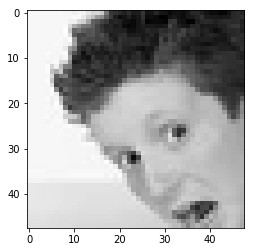

[1.3305567e-03 2.4325444e-10 1.0756151e-05 9.9865830e-01 3.1643947e-07
 2.9591659e-08 7.1509950e-14]


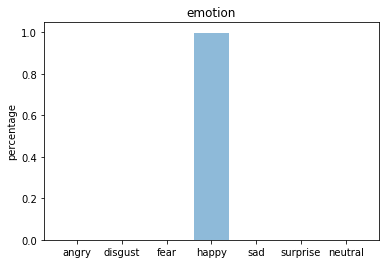

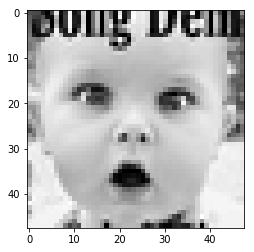

[6.1996721e-24 2.5997607e-34 5.3439023e-16 9.6624403e-14 1.0190831e-27
 1.0000000e+00 1.0472437e-15]


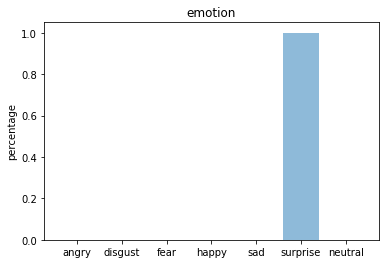

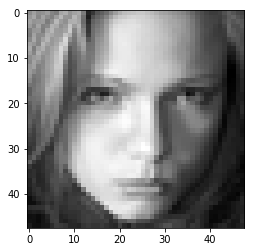

[3.5800625e-02 1.1364548e-05 3.8913213e-02 1.1150028e-04 9.2314798e-01
 1.0134275e-07 2.0152091e-03]


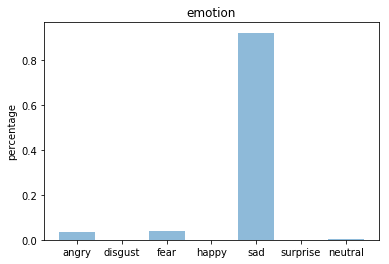

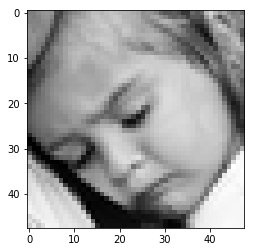

[4.6325390e-06 8.9025747e-08 4.3956246e-03 3.7596353e-06 9.9551493e-01
 1.8986263e-08 8.0962571e-05]


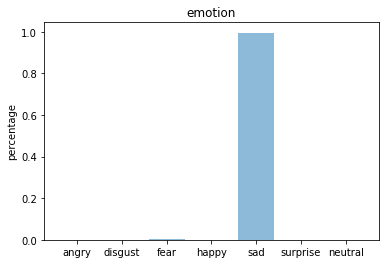

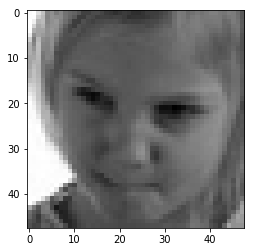

[9.9984443e-01 2.6970588e-07 9.9712095e-05 7.3554639e-07 5.4752581e-05
 6.4892020e-10 4.8503122e-08]


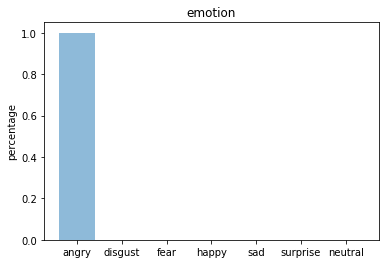

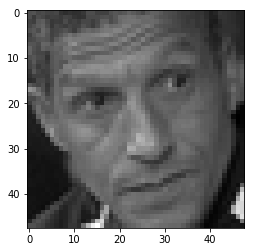

[4.0486455e-03 2.4944583e-08 1.1902230e-01 8.0841874e-06 3.7337985e-02
 6.9398469e-05 8.3951354e-01]


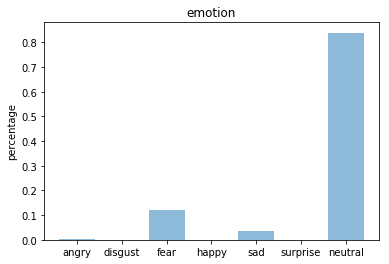

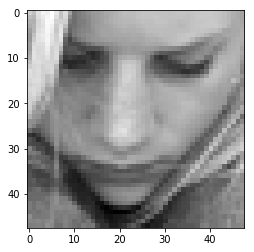

[3.2312403e-04 6.0243571e-10 3.5742973e-04 4.9168000e-01 5.0763702e-01
 5.3756830e-12 2.4918586e-06]


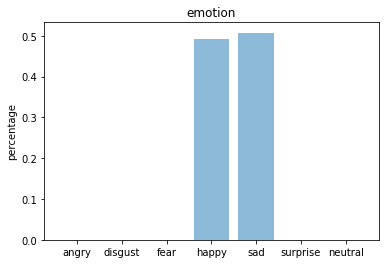

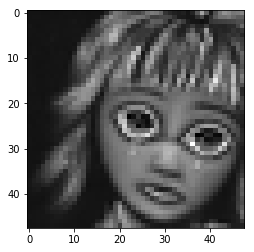

[5.5281213e-04 4.8330417e-08 6.2610794e-05 1.7343771e-02 9.4289076e-01
 5.7923650e-08 3.9149884e-02]


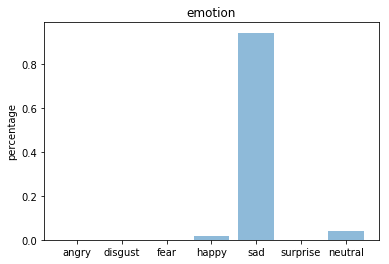

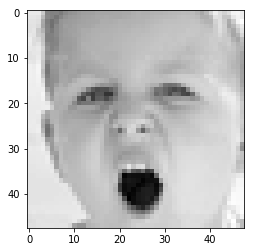

[1.9262078e-01 9.4373426e-11 3.2423155e-03 1.8602685e-05 1.8403780e-05
 4.8988938e-01 3.1421053e-01]


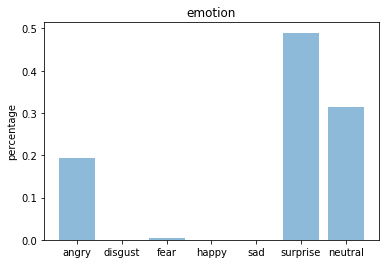

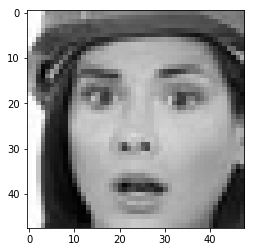

[6.6172750e-16 1.2131719e-23 1.3604658e-04 1.1929887e-11 3.0311733e-21
 9.9986398e-01 5.3390492e-20]


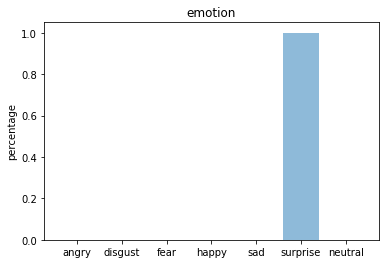

In [32]:
monitor_testset_results = True

if monitor_testset_results == True:
	#make predictions for test set
	predictions = model.predict(x_test)

	index = 0
	for i in predictions:
		if index < 30 and index >= 20:
			testing_img = np.array(x_test[index], 'float32')
			testing_img = testing_img.reshape([48, 48]);
			plt.gray()
			plt.imshow(testing_img)
			plt.show()
			print(i)
			emotion_analysis(i)

		index = index + 1

In [33]:
from sklearn.metrics import classification_report, confusion_matrix
 
pred_list = []; actual_list = []
 
for i in predictions:
 
  pred_list.append(np.argmax(i))
 
for i in y_test:
 
  actual_list.append(np.argmax(i))
 
confusion_matrix(actual_list, pred_list)

array([[211,   3,  69,  50,  57,  20,  57],
       [ 12,  28,   5,   6,   3,   0,   2],
       [ 53,   0, 220,  40,  80,  49,  54],
       [ 35,   0,  31, 699,  39,  31,  60],
       [ 77,   1, 111,  72, 264,  22, 106],
       [ 19,   0,  39,  16,   9, 318,  14],
       [ 64,   0,  54,  68,  94,  30, 297]])

In [0]:
from keras.models import load_model
model = load_model('model25.h5')

In [0]:
def emotion_analysis(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    y_pos = np.arange(len(objects))
    
    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    
    plt.show()

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


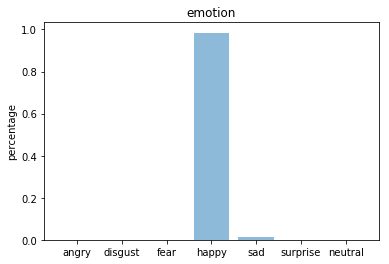

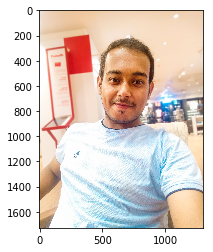

In [36]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt


file = 'gdrive/My Drive/Colab Notebooks/ash.jpg'
true_image = image.load_img(file)
img = image.load_img(file, grayscale=True, target_size=(48, 48))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(true_image)
plt.show()

In [37]:
import cv2
            
def facecrop(image):  
    facedata = "haarcascade_frontalface_default.xml"
    cascade = cv2.CascadeClassifier(facedata)

    img = cv2.imread(image)

    try:
    
        minisize = (img.shape[1],img.shape[0])
        miniframe = cv2.resize(img, minisize)

        faces = cascade.detectMultiScale(miniframe)

        for f in faces:
            x, y, w, h = [ v for v in f ]
            cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)

            sub_face = img[y:y+h, x:x+w]

            
            cv2.imwrite('capture.jpg', sub_face)
            #print ("Writing: " + image)

    except Exception as e:
        print (e)

    #cv2.imshow(image, img)


if __name__ == '__main__':
    facecrop('1.jpg')

'NoneType' object has no attribute 'shape'


In [0]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='gdrive/My Drive/Colab Notebooks/photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [0]:
take_photo()

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


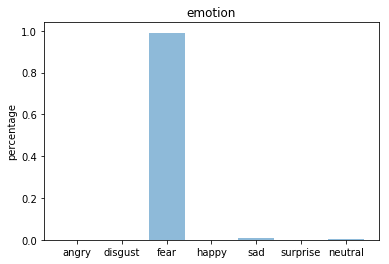

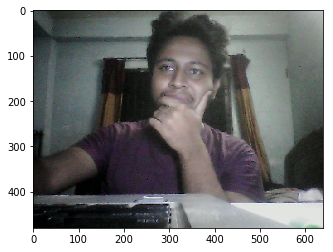

In [0]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt


file = 'gdrive/My Drive/Colab Notebooks/photo.jpg'
true_image = image.load_img(file)
img = image.load_img(file, grayscale=True, target_size=(48, 48))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(true_image)
plt.show()